In [70]:
# import all python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [39]:
#data read using pandas
url = r'C:\Users\goura\Downloads\dataset1-master\dataset1-master\mushrooms_data.csv'
mushrooms_data = pd.read_csv(url)

In [40]:
#print 5 starting data 
mushrooms_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
#print all information about mushrooms_data
mushrooms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [42]:
#print all coulmns name
mushrooms_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Poisonous to edible ration

In [43]:
#poisonous to edible ratio
edible_count = mushrooms_data[mushrooms_data['class']=='e']['class'].count()#count edible mushrooms
poisonous_count = mushrooms_data[mushrooms_data['class']=='p']['class'].count()#count Poisonous mushrooms
ration = poisonous_count/float(edible_count)

print('''################################
#  Poisonous to edible ration  #
################################''')
print(f'\nEdible mushrooms count = {edible_count}\nPoisonous mushrooms count = {poisonous_count}\nRatio = {ration.round(2)}')

################################
#  Poisonous to edible ration  #
################################

Edible mushrooms count = 4208
Poisonous mushrooms count = 3916
Ratio = 0.93


#########################################
#  Poisonous and Edible Mushrooms Graph #
#########################################


Edible mushrooms count = 4208 represent by orange 
Poisonous mushrooms count = 3916 represent by blue



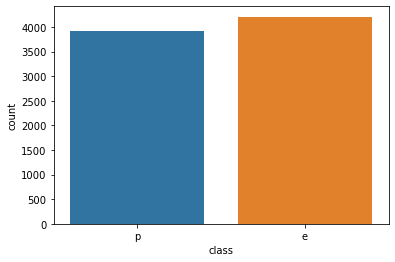

In [44]:
sns.countplot(x=mushrooms_data['class'], data=mushrooms_data)


print('''#########################################
#  Poisonous and Edible Mushrooms Graph #
#########################################\n''')
print(f'\nEdible mushrooms count = {edible_count} represent by orange \nPoisonous mushrooms count = {poisonous_count} represent by blue\n')

# Mushrooms check unique values 

In [45]:
columns = mushrooms_data.columns.values
#for_loop run  columns times and print all unique value to columns 
for num in columns:
    print('{0}: {1}'.format(num,mushrooms_data[num].unique()))

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [46]:
#only 1 unique value in this columns that by remove this colmuns in data
mushrooms_data = mushrooms_data.drop('veil-type',axis=1)
mushrooms_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [47]:
# use one-hot encoder to encode the mushroom
mushrooms_onehot=pd.get_dummies(mushrooms_data)

# drop class_p columns in data set and only use class_p for indicator
mushrooms_onehot=mushrooms_onehot.drop(['class_e'],axis=1)

mushrooms_onehot.head()


,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [48]:
# print the name and number of features after one-hot encoding
encode = list(mushrooms_onehot.columns[1:])
print(f"total {len(encode)} features after one-hot encoding\n")
print(encode)


total 116 features after one-hot encoding

['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y'

In [49]:
mushrooms_onehot.head()

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [50]:
#Add one more columns in data  column name = id
mushrooms_data['id'] = np.arange(1,mushrooms_data.shape[0]+1)

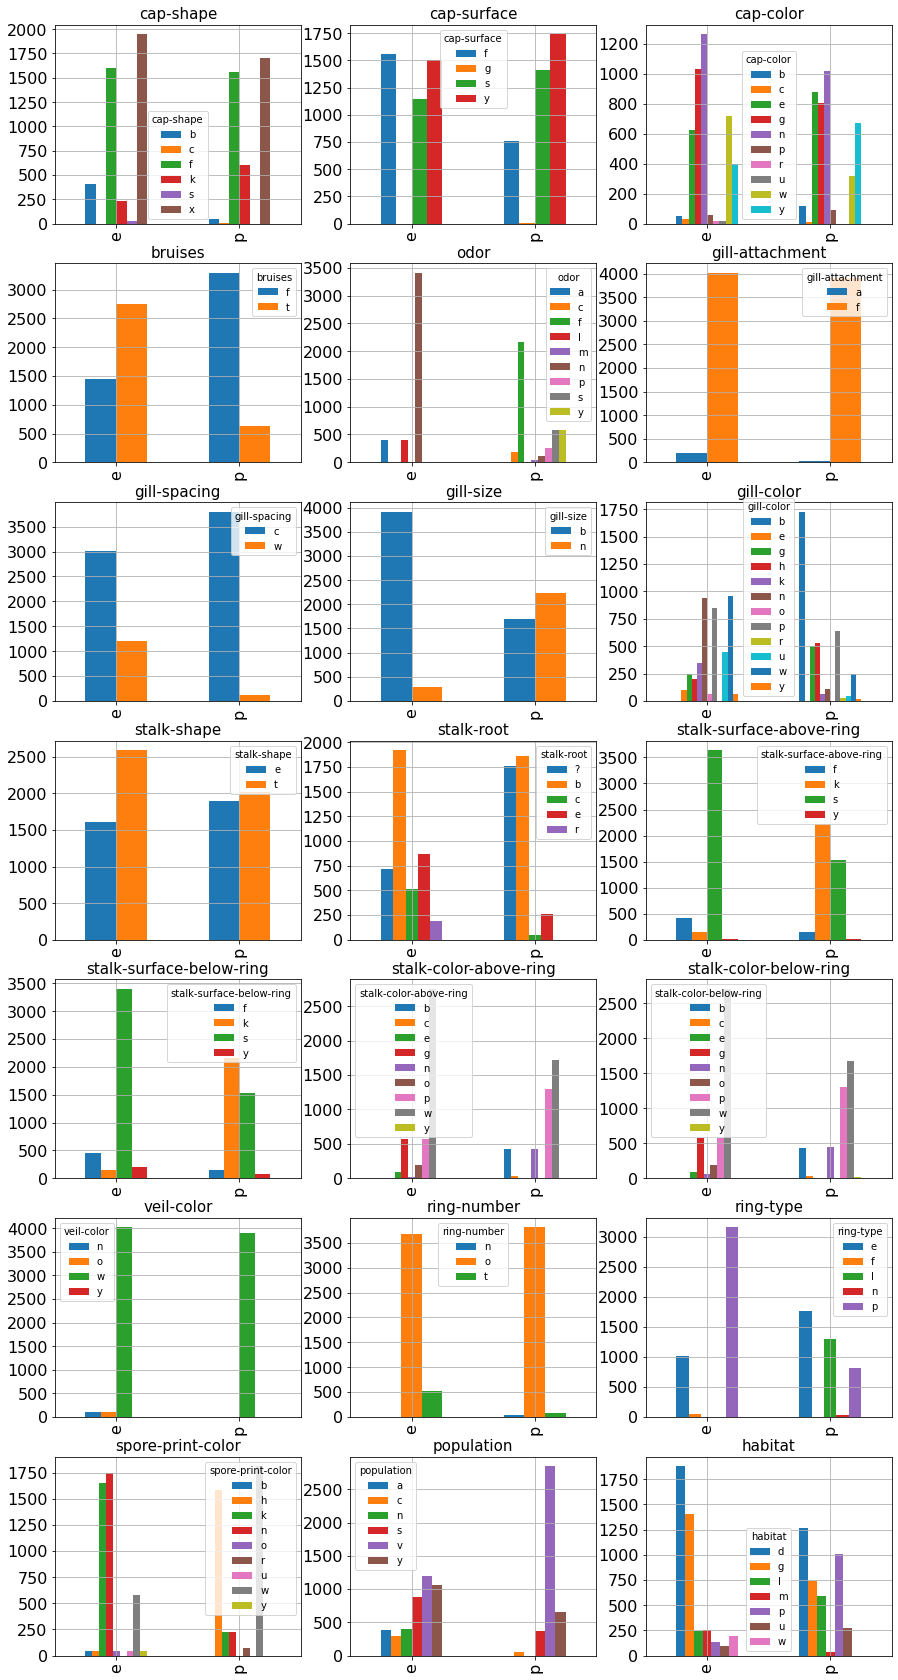

In [51]:
f_columns = mushrooms_data.columns[1:]
fig,axes = plt.subplots(nrows=7,ncols=3,figsize=(15,30))

for f, ax in zip(f_columns,axes.ravel()):
    mushrooms_data.groupby(['class',f])['id'].count().unstack(f).plot(kind='bar',ax=ax,legend=True,grid=True,fontsize=16)
    ax.set_title(f,size=15)
    ax.set_xlabel('\n',size=15)
    

In [52]:
#drop added column in data
mushrooms_data = mushrooms_data.drop('id',axis=1)

# Features Class Correlation

In [55]:
#Calculate correlation by pd.corr()
corr = mushrooms_onehot.corr().loc[:,'class_p']
top_10_corr = corr.abs().sort_values(ascending=False).head(n=11).iloc[1:]

print(f'Top 10 features to class_p correlation: \n\n{top_10_corr}' )


Top 10 features to class_p correlation: 

odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_t                     0.501530
bruises_f                     0.501530
Name: class_p, dtype: float64


Visualize To-10 feature to class_p correation: 


<AxesSubplot:>

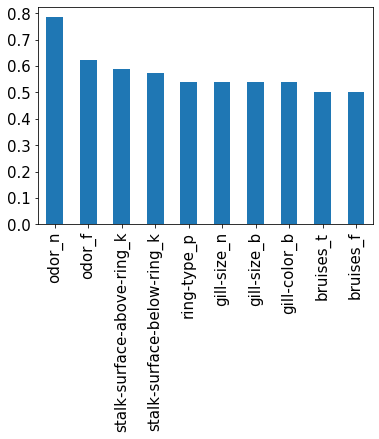

In [56]:
print('Visualize To-10 feature to class_p correation: ')
top_10_corr.plot(kind='bar',fontsize=15)

# Logistic Regression

In [57]:
#data read using pandas
url = r'C:\Users\goura\Downloads\dataset1-master\dataset1-master\mushrooms_data.csv'
mushrooms_data = pd.read_csv(url)
# use one-hot encoder to encode the mushroom
mushrooms_onehot=pd.get_dummies(mushrooms_data)

# drop class_p columns in data set and only use class_p for indicator
mushrooms_onehot=mushrooms_onehot.drop(['class_e'],axis=1)
#print first 5 rows
mushrooms_onehot.head()


,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [60]:
#describe mushrooms data
mushrooms_onehot.describe()

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
#delete list columns
Del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number'] 
X =mushrooms_data.copy()
#run for_loop for delete  columns
for col in Del_cols:
    X = X.drop(col, axis = 1)
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head(2)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [64]:
# y data 
y = mushrooms_data['class']
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [65]:
#model
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

#final result collection
model_1 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_1.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.896000   1.000000  0.784439  0.879199
Valid2  0.999385   1.000000  0.998723  0.999361
Valid3  0.973538   1.000000  0.945083  0.971766
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.862069   0.782038  0.989783  0.873732 


Mean Scores:

	accuracy: 0.9462
	precision: 0.9564
	recall: 0.9436
	f1: 0.9448


In [67]:
#sample prediction for csv file
LR.fit(X_train, y_train)#training
y_predict = LR.predict(X_test)#predicting
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Logistic_Regression

,y_test,prediction
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
6088,0,0
6089,0,0
6090,1,1
6091,0,0


# Decision Tree

In [71]:
#model
DT = DecisionTreeClassifier()
#cross validation
DT_report = pd.DataFrame(cross_validate(DT, X, y, scoring=scoring))
#getting required score methods
DT_report = DT_report.iloc[:,2:]
#naming the columns
DT_report.columns = scoring
#naming the index
DT_report.index = index

#final result collection
model_2 = []

#Classification report
print("Clasification report:\n")
print(DT_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(DT_report[score].mean(),4)}")
    model_2.append(round(DT_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462    1.00000  0.673469  0.804878
Valid2  1.000000    1.00000  1.000000  1.000000
Valid3  1.000000    1.00000  1.000000  1.000000
Valid4  1.000000    1.00000  1.000000  1.000000
Valid5  0.985222    0.97026  1.000000  0.984906 


Mean Scores:

	accuracy: 0.9655
	precision: 0.9941
	recall: 0.9347
	f1: 0.958
